In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()


In [3]:
raw_data = pd.read_csv("2.02. Binary Predictors.csv")
raw_data.head(3)

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female


In [4]:
data = raw_data.copy()

In [5]:
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head(3)

,SAT,Admitted,Gender
0,1363,0,Male
1,1792,1,Female
2,1954,1,Female


In [6]:
y = data['Admitted']
x1 = data['SAT']

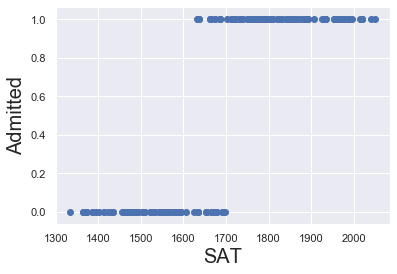

In [7]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', FontSize=20)
plt.ylabel('Admitted', FontSize=20)
plt.show()

## Regression

In [19]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

results_log.summary()

Optimization terminated successfully.
         Current function value: 0.145208
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  169
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Jan 2020   Pseudo R-squ.:                  0.7881
Time:                        14:49:08   Log-Likelihood:                -24.540
converged:                       True   LL-Null:                       -115.83
Covariance Type:            nonrobust   LLR p-value:                 1.320e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.6486     14.524     -4.589      0.000     -95.115     -38.183
SAT            0.0401      0.009      4.600      0.000       0.023       0.057
==============================================================================

Possibly complete quasi-separation: A fraction 0.24 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Plot With a Logistic Regression Curve

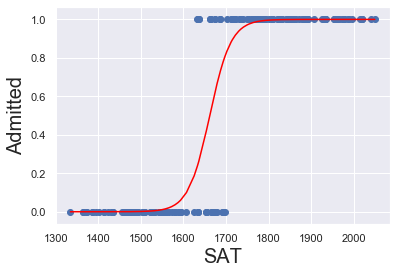

In [17]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1+ np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')

plt.plot(x_sorted,f_sorted,color='red')

plt.xlabel('SAT', FontSize=20)
plt.ylabel('Admitted', FontSize=20)
plt.show()


## Add Gender to the above regression

In [21]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
data.head(3)

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1


In [22]:
y = data['Admitted']
x1 = data[['SAT', 'Gender']]

In [37]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.123131
         Iterations 10


C:\Users\Mahdi Bayat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  169
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            2
Date:                Sun, 05 Jan 2020   Pseudo R-squ.:                  0.8204
Time:                        18:12:48   Log-Likelihood:                -20.809
converged:                       True   LL-Null:                       -115.83
Covariance Type:            nonrobust   LLR p-value:                 5.386e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.9462     15.829     -4.229      0.000     -97.969     -35.923
SAT            0.0398      0.009      4.204      0.000       0.021       0.058
Gender         2.1305      0.839      2.538      0.011       0.485       3.776
==============================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Given the same SAT score, a Female has 8.4 times higher odds to get admitted in compare to males.

In [24]:
np.exp(2.1305)

8.419075296879534

#### Log-likelihood of the 2 models

first model has a log-likelihood of -24.540

second model has a log-likelihood of -20.809

the second model has a higher log-likelihood meaning it is a better one

the SAT and Gender are outstanding predictor based on the P>|z| value from the table. ~0.000


## Accuracy OF the Model

In [25]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.03, 0.99, 1.00, 1.00, 1.00, 0.02, 1.00,
       1.00, 0.79, 0.00, 0.59, 1.00, 0.12, 0.12, 0.56, 0.56, 1.00, 1.00,
       1.00, 0.00, 0.01, 0.97, 1.00, 0.54, 0.99, 1.00, 1.00, 0.00, 0.86,
       0.25, 1.00, 1.00, 1.00, 0.31, 1.00, 0.24, 0.00, 0.02, 0.51, 1.00,
       0.00, 0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.93, 0.03,
       1.00, 0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98,
       0.00, 0.00, 0.00, 1.00, 0.00, 0.77, 0.12, 0.00, 0.99, 1.00, 1.00,
       0.00, 0.31, 1.00, 1.00, 0.00, 1.00, 1.00, 0.88, 1.00, 1.00, 0.00,
       1.00, 1.00, 0.91, 0.85, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.04,
       1.00, 0.96, 1.00, 0.00, 1.00, 0.02, 0.02, 1.00, 1.00, 1.00, 0.00,
       0.00, 0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.78, 1.00,
       1.00, 0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.56, 0.53, 0.86, 0.85,
       0.00, 1.00, 0.00, 0.00, 0.00, 1.00, 0.05, 0.00, 0.01, 1.00, 0.99,
       0.51, 1.00, 1.00, 0.07, 0.00, 0.00, 0.00, 0.

#### These are the probabitlies. In the model, these are the values of pie (the probability of being admitted). Values less than 0.5 means there is less than 50% chance of admission so we would round down. Alternatively, Values above 0.5, mean there is more than 50% chance of admission so we would round it up. Using this simplification, we can compare the actual values with the predicted values of the model.

In [26]:
#Actual Values

np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

### if 80% of the predicted values coincide with the actual values, we say the model has 80% ACCURACY.

## Confusion Matrix will do that for us.

In [27]:
results_log.pred_table()

array([[69.00, 5.00],
       [2.00, 93.00]])

In [28]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,2.0,93.0


Confusion Matrix shows how confused our model is.

#### For 69 observations model predicted 0 and the true value was 0.

#### For 93 observations model predicted 1 and the true value was 1.

#### For 2 observations model predicted 0 while the true value was 1.

#### For 5 observations model predicted 1 while the true value was 0.

##### The most important metric we can calculate is accuracy.


In [31]:
cm = np.array(cm_df)
cm

array([[69.00, 5.00],
       [2.00, 93.00]])

In [32]:
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9585798816568047

## Our model has 95% accuracy !!!

# Test the Model

### Testing is done on a dataset the model has never seen before

In [34]:
testData = pd.read_csv("Test Dataset.csv")
testData.head(2)

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female


In [35]:
testData['Admitted'] = testData['Admitted'].map({'No': 0, 'Yes':1})
testData['Gender'] = testData['Gender'].map({'Male': 0, 'Female':1})
testData.head(3)

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1


#### 1- We will use our model to make predictions based on the test data.
#### 2- We will compare those with the actual outcomes.
#### 3- Calculate the Accuracy
#### 4- Create a Confusion Matrix

In [36]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
164,1.0,1722,1
165,1.0,1750,0
166,1.0,1555,0
167,1.0,1524,0


#### Note: The order is very important because the coefficients of the regression will expect it (const, SAT, Gender)

In [40]:
test_actual = testData['Admitted']
test_data = testData.drop(['Admitted'], axis=1)
test_data = sm.add_constant(test_data)
test_data.head(4)

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0


In [43]:
def confusion_matrix(data, actual_values, model):
    
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    
    return cm, accuracy

In [44]:
cm = confusion_matrix(test_data, test_actual, results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]), 0.8947368421052632)

#### The accuracy of our model is 89.4%. 
#### The test accuracy is the figure we use when we refer to overall accuracy of the regression. 
#### Almost always the training accuracy is higher than test accuracy, and thats because of the overfitting we talked about.


In [45]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


## Missclassification Rate

#### The opposite of accuracy is Missclassification rate.
#### Missclassification_rate = # missclassified / # all elements

In [46]:
print('Missclassification Rate:  ' + str((1+1)/19))

Missclassification Rate:  0.10526315789473684
